In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 15.1 MB/s 
     |████████████████████████████████| 9.8 MB 63.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

In [3]:
dataset = pd.read_csv("AirPassengers.csv")

In [4]:
dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
dataset = pd.read_csv("AirPassengers.csv", parse_dates = ['Month'], index_col = 'Month', date_parser=dateparse)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [6]:
dataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
time_series = dataset['#Passengers']

In [8]:
time_series

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [9]:
time_series[1]

118

In [10]:
time_series['1949-02']

Month
1949-02-01    118
Name: #Passengers, dtype: int64

In [11]:
time_series[:'1950-01-31']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
Name: #Passengers, dtype: int64

In [12]:
time_series['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

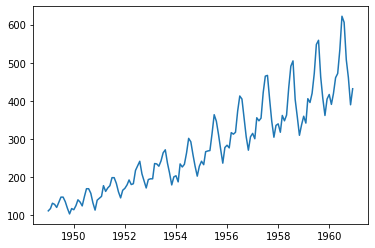

In [13]:
plt.plot(time_series)

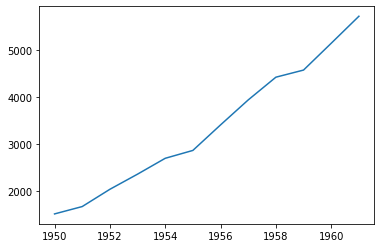

In [14]:
time_series_ano = time_series.resample('A').sum()
plt.plot(time_series_ano);

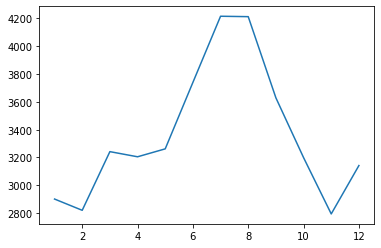

In [15]:
time_series_mes = time_series.groupby([lambda x: x.month]).sum()
plt.plot(time_series_mes);

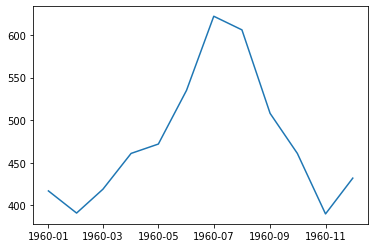

In [16]:
time_series_datas = time_series['1960-01-01':'1960-12-01']
plt.plot(time_series_datas);

In [17]:
decomposicao = seasonal_decompose(time_series)
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid

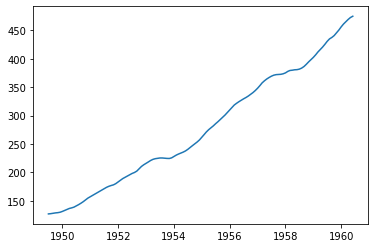

In [18]:
plt.plot(tendencia);

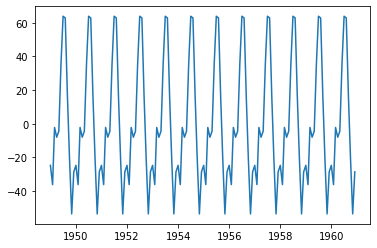

In [19]:
plt.plot(sazonal);

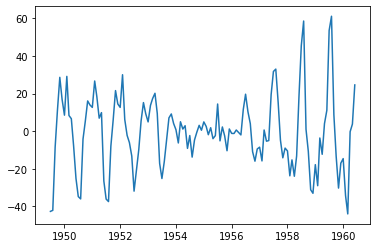

In [20]:
plt.plot(aleatorio);

In [21]:
model = auto_arima(time_series, order=(2, 1, 2))

In [22]:
model.order

(4, 1, 3)

In [23]:
predictions = model.predict(n_periods=12)
predictions

array([467.57401654, 490.49500228, 509.1373897 , 492.55512361,
       495.30611115, 475.94779765, 476.33978849, 475.55210622,
       472.35391134, 483.88982165, 475.57040329, 485.92175018])

In [24]:
len(time_series)

144

In [25]:
train = time_series[:130]
train.shape

(130,)

In [26]:
train.index.min(), train.index.max()

(Timestamp('1949-01-01 00:00:00'), Timestamp('1959-10-01 00:00:00'))

In [27]:
test = time_series[130:]
test.shape

(14,)

In [28]:
test.index.min(), test.index.max()

(Timestamp('1959-11-01 00:00:00'), Timestamp('1960-12-01 00:00:00'))

In [29]:
model2 = auto_arima(train)

In [30]:
prediction = pd.DataFrame(model2.predict(n_periods=14), index=test.index)
prediction.columns = ['passengers_predictions']
prediction

,passengers_predictions
Month,
1959-11-01,357.690517
1959-12-01,334.857459
1960-01-01,342.488602
1960-02-01,375.944537
1960-03-01,424.126289
1960-04-01,473.151441
1960-05-01,510.388373
1960-06-01,527.724236
1960-07-01,523.268325


In [31]:
test

Month
1959-11-01    362
1959-12-01    405
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

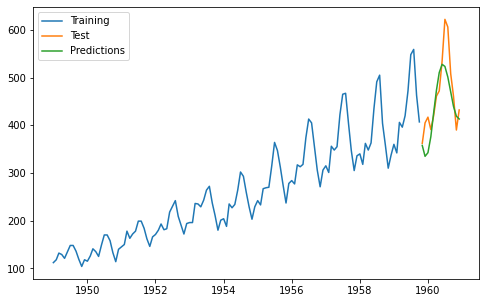

In [32]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Predictions')
plt.legend();

# Facebook Prophet

In [33]:
!pip install fbprophet

In [34]:
from fbprophet import Prophet
import pandas as pd

In [35]:
dataset = pd.read_csv('page_wikipedia.csv')
dataset

,date,views
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [36]:
dataset.describe()

,views
count,2905.000000
mean,8.138958
std,0.845957
min,5.262690
25%,7.514800
50%,7.997999
75%,8.580168
max,12.846747


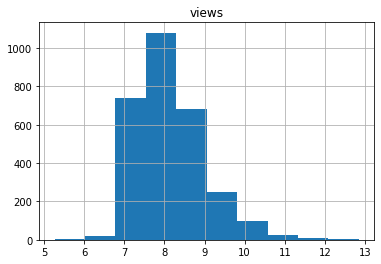

In [37]:
dataset.hist();

In [38]:
dataset = dataset[['date', 'views']].rename(columns = {'date': 'ds', 'views': 'y'})
dataset

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [39]:
dataset = dataset.sort_values(by = 'ds')
dataset

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [40]:
model = Prophet()
model.fit(dataset)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

In [42]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.040603,8.263879,9.436051,8.040603,8.040603,0.803055,0.803055,0.803055,0.352293,0.352293,0.352293,0.450762,0.450762,0.450762,0.0,0.0,0.0,8.843657
1,2007-12-11,8.039061,7.984726,9.197957,8.039061,8.039061,0.553139,0.553139,0.553139,0.119645,0.119645,0.119645,0.433495,0.433495,0.433495,0.0,0.0,0.0,8.592200
2,2007-12-12,8.037518,7.760607,8.990684,8.037518,8.037518,0.350502,0.350502,0.350502,-0.066660,-0.066660,-0.066660,0.417162,0.417162,0.417162,0.0,0.0,0.0,8.388020
3,2007-12-13,8.035976,7.757380,8.975256,8.035976,8.035976,0.329951,0.329951,0.329951,-0.072258,-0.072258,-0.072258,0.402209,0.402209,0.402209,0.0,0.0,0.0,8.365927
4,2007-12-14,8.034434,7.752342,8.986995,8.034434,8.034434,0.319465,0.319465,0.319465,-0.069577,-0.069577,-0.069577,0.389042,0.389042,0.389042,0.0,0.0,0.0,8.353899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2990,2016-04-15,7.467387,6.313202,7.533151,7.439576,7.491027,-0.560917,-0.560917,-0.560917,-0.069577,-0.069577,-0.069577,-0.491340,-0.491340,-0.491340,0.0,0.0,0.0,6.906470
2991,2016-04-16,7.466352,6.100116,7.374816,7.437656,7.489936,-0.772972,-0.772972,-0.772972,-0.311718,-0.311718,-0.311718,-0.461254,-0.461254,-0.461254,0.0,0.0,0.0,6.693380
2992,2016-04-17,7.465317,6.436429,7.675632,7.435793,7.490154,-0.383291,-0.383291,-0.383291,0.048276,0.048276,0.048276,-0.431567,-0.431567,-0.431567,0.0,0.0,0.0,7.082026
2993,2016-04-18,7.464282,6.786598,8.048752,7.434161,7.490553,-0.050726,-0.050726,-0.050726,0.352293,0.352293,0.352293,-0.403019,-0.403019,-0.403019,0.0,0.0,0.0,7.413556


In [43]:
len(dataset), len(forecast)

(2905, 2995)

In [45]:
forecast.tail(90)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2905,2016-01-21,7.555356,7.899295,9.182914,7.555356,7.555356,0.999964,0.999964,0.999964,-0.072258,-0.072258,-0.072258,1.072222,1.072222,1.072222,0.0,0.0,0.0,8.555319
2906,2016-01-22,7.554321,7.941720,9.204743,7.554321,7.554321,1.016945,1.016945,1.016945,-0.069577,-0.069577,-0.069577,1.086522,1.086522,1.086522,0.0,0.0,0.0,8.571266
2907,2016-01-23,7.553286,7.723328,8.924907,7.553286,7.553286,0.786647,0.786647,0.786647,-0.311718,-0.311718,-0.311718,1.098365,1.098365,1.098365,0.0,0.0,0.0,8.339933
2908,2016-01-24,7.552251,8.118268,9.347670,7.552251,7.552251,1.155631,1.155631,1.155631,0.048276,0.048276,0.048276,1.107355,1.107355,1.107355,0.0,0.0,0.0,8.707882
2909,2016-01-25,7.551216,8.373547,9.602830,7.551216,7.551216,1.465374,1.465374,1.465374,0.352293,0.352293,0.352293,1.113081,1.113081,1.113081,0.0,0.0,0.0,9.016590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2990,2016-04-15,7.467387,6.313202,7.533151,7.439576,7.491027,-0.560917,-0.560917,-0.560917,-0.069577,-0.069577,-0.069577,-0.491340,-0.491340,-0.491340,0.0,0.0,0.0,6.906470
2991,2016-04-16,7.466352,6.100116,7.374816,7.437656,7.489936,-0.772972,-0.772972,-0.772972,-0.311718,-0.311718,-0.311718,-0.461254,-0.461254,-0.461254,0.0,0.0,0.0,6.693380
2992,2016-04-17,7.465317,6.436429,7.675632,7.435793,7.490154,-0.383291,-0.383291,-0.383291,0.048276,0.048276,0.048276,-0.431567,-0.431567,-0.431567,0.0,0.0,0.0,7.082026
2993,2016-04-18,7.464282,6.786598,8.048752,7.434161,7.490553,-0.050726,-0.050726,-0.050726,0.352293,0.352293,0.352293,-0.403019,-0.403019,-0.403019,0.0,0.0,0.0,7.413556


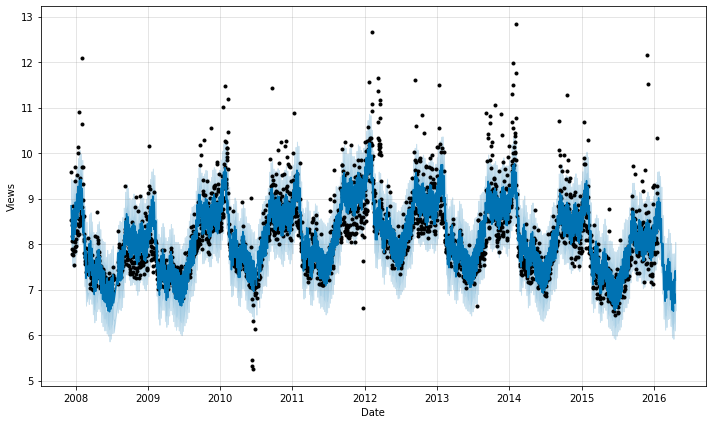

In [47]:
model.plot(forecast, xlabel='Date', ylabel='Views');

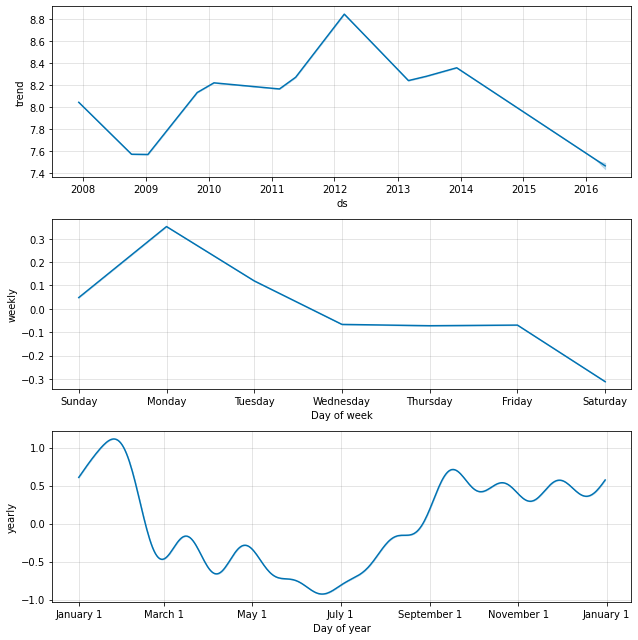

In [48]:
model.plot_components(forecast);

In [49]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [50]:
plot_components_plotly(model, forecast)